###### Tables to cover:
* 5-1
* 5-2

In [1]:
# import
import pandas as pd

#### 5.1 Introduction to pandas Data Structures 

#####  Series

In [2]:
# one-d array-like object
obj = pd.Series([4, 7, -5, 3])
obj # default index is 0 to N-1

0    4
1    7
2   -5
3    3
dtype: int64

Important attributes:

In [3]:
obj.values

array([ 4,  7, -5,  3])

In [4]:
obj.index # similar to range

RangeIndex(start=0, stop=4, step=1)

Custom index:

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

Similar to numpy arrays:

In [6]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [7]:
obj2['a']

-5

In [8]:
obj2['d'] = 0

In [9]:
obj2[['a', 'c', 'd']]

a   -5
c    3
d    0
dtype: int64

In [10]:
# boolean filtering
obj2[obj2>0]

b    7
c    3
dtype: int64

In [11]:
# multiplication
obj2*2

d     0
b    14
a   -10
c     6
dtype: int64

In [12]:
# numpy functions
import numpy as np
np.exp(obj2)

d       1.000000
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Can be used as a dictionary:

In [13]:
'a' in obj2

True

In [14]:
'e' in obj2

False

Creating series from a dictionary:

In [15]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
sdata

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [16]:
obj3 = pd.Series(sdata)
obj3 # sorted order dict keys

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [17]:
# override index order
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 # NaN - Not a Number or missing values

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [18]:
# check for missing values
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [19]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [20]:
# using instance method
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Series index automatically aligns during math ops

In [21]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [22]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [23]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

the **name** attribute

In [24]:
# for Series object
obj4.name

In [25]:
obj4.name = 'population'
obj4.name

'population'

In [26]:
# for index 
obj4.index.name

In [27]:
obj4.index.name = 'states'
obj4.index.name

'states'

In [28]:
obj4

states
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Inplace aleteration of indices of a Series

In [29]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [30]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

##### Dataframe 

In [31]:
# creating dataframe using dictionary
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada','Nevada', 'Nevada'],
       'year': [2000, 2001, 2002, 2001, 2002, 2003],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [32]:
frame.head() # first 5 rows

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [33]:
# arrange cols in particular order
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [34]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                     index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2 # new column with NaNs

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [35]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Access a column (column is retrieved as a Series)

In [36]:
frame2['year']

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [37]:
frame2.year # convinient with tab completion

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Access particular rows with loc attribute

In [38]:
frame2.loc['three'] # label based or can access using boolean array

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [39]:
frame2.iloc[3] # integer location based

year       2001
state    Nevada
pop         2.4
debt        NaN
Name: four, dtype: object

Colums can be modified by assignment

In [40]:
frame2['debt'] = 16.5

In [41]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [42]:
frame2['debt'] = np.arange(6.)

In [43]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


Assigning a Series to existing DataFrame

In [44]:
val = pd.Series(data=[-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
# any other cells will be filled with NaN
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assign a column and Delete a column

In [45]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [46]:
# delete column
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Data as nested dict of dicts

In [47]:
pop = {'Nevada': {2001: 2.4, 2002: 3.4},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3 # outer keys: columns, inner keys: indices

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,3.4,3.6


Transpose dataframe

In [48]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,3.4
Ohio,1.5,1.7,3.6


Explicit index can be defined with required order

In [49]:
pd.DataFrame(pop, index=[2001, 2002, 2003]) # dict keys order will be ignored

,Nevada,Ohio
2001,2.4,1.7
2002,3.4,3.6
2003,NaN,NaN


Dicts and Series are treated similarly

In [50]:
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


Names of DataFrame's index and columns

In [51]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,3.4,3.6


DataFrame to a 2-D Numpy Array

In [52]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [3.4, 3.6]])

In [53]:
# with diff dtypes
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

##### Index Objects

In [54]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [55]:
index[1:]

Index(['b', 'c'], dtype='object')

index objects are immutable

In [56]:
index[0] = 'v'

TypeError: Index does not support mutable operations

In [57]:
# because of immutability, it is easy to share index object among data structures
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [58]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [59]:
obj2.index is labels

True

Index also behaves like a fixed-size set

In [60]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,3.4,3.6


In [61]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [62]:
'Ohio' in frame3.columns

True

In [63]:
2001 in frame3.index

True

index can also contain duplicate elements

In [64]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

#### 5.2 Essential Functionality

##### Reindexing

In [65]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=list('dbac'))
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [66]:
obj2 = obj.reindex(list('abcde'))
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

Filling missing values using **method** option

In [67]:
obj3 = pd.Series('blue, purple, yellow'.split(', '), index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [68]:
obj3.reindex(range(6), method='ffill') # forward fill

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [69]:
obj3.reindex(range(6), method='bfill') # backward fill

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

With DataFrame

In [70]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=list('acd'), columns='Ohio, Texas, California'.split(', '))
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [71]:
frame2 = frame.reindex(list('abcd'))
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [72]:
# reindexing columns
states = 'Texas, Utah, California'.split(', ')
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [73]:
# reindexing with loc
frame.loc[list('abcd'), states]

/home/seed9six/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


##### Dropping Entries from an axis

With Series

In [74]:
obj = pd.Series(np.arange(5.), index=list('abcde'))
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [75]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [76]:
obj.drop(list('dc'))

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame

In [77]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index='Ohio, Colorado, Utah, New York'.split(', '),
                  columns = 'one, two, three, four'.split(', '))
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [78]:
# drop by rows
data.drop('Colorado, Ohio'.split(', '))

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [79]:
# drop by cols
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [80]:
data.drop('two, four'.split(', '), axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [81]:
# inplace
obj.drop('c', inplace=True)

In [82]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

#####  Indexing, Selection and Filtering

With Series<br/>
Series indexing is similar to NumPy indexing except it can also use string values for indexing

In [83]:
obj = pd.Series(np.arange(4.), index=list('abcd'))
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [84]:
obj['b']

1.0

In [85]:
obj[1]

1.0

In [86]:
obj[1:4]

b    1.0
c    2.0
d    3.0
dtype: float64

In [87]:
obj[list('bac')]

b    1.0
a    0.0
c    2.0
dtype: float64

In [88]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [89]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

In [90]:
# end point is inclusive in series slicing
obj['b' : 'c']

b    1.0
c    2.0
dtype: float64

In [91]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

With DataFrame

In [92]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index = 'Ohio, Colorado, Utah, New York'.split(', '),
                   columns = 'one, two, three, four'.split(', '))
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [93]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [94]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [95]:
# slicing / selection using boolean array
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [96]:
data[data['three']>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [97]:
# scalar comparision
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [98]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


##### Selection with loc and iloc

loc: selection by labels

In [99]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

iloc: selection by integers

In [100]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [101]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [102]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


With single labels or list of labels

In [103]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [104]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [105]:
data.at['Utah', 'one']

8

In [106]:
data.get_values()

array([[ 0,  0,  0,  0],
       [ 0,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

##### Integer Indexes

In [114]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [115]:
try:
    ser[-1]
except KeyError:
    print('KeyError')

KeyError


to avoid some ambiguties pandas series works good with non-integer index

In [116]:
ser2 = pd.Series(np.arange(3.), index=list('abc'))
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [117]:
ser2[-1]

2.0

default data selection is label-oriented

In [120]:
ser[:1]

0    0.0
dtype: float64

In [121]:
ser2[:1]

a    0.0
dtype: float64

Use loc and iloc for precise selection

In [124]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [125]:
ser.iloc[:1]

0    0.0
dtype: float64

In [129]:
ser2.loc[:'b']

a    0.0
b    1.0
dtype: float64

In [128]:
ser2.iloc[:1]

a    0.0
dtype: float64

##### Arithmetic and Data Alignment

behaviour of arithmetic between objects with different indexes

In [130]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=list('acde'))
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=list('acefg'))

In [131]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [132]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [133]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

missing values are assigned to locations that don't overlap

With DataFrame:

In [135]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index='Ohio, Texas, Colorado'.split(', '))
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index='Utah, Ohio, Texas, Oregon'.split(', '))

In [136]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [137]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [138]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


DataFrames with no common labels / rows

In [139]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1

,A
0,1
1,2


In [140]:
df2

,B
0,3
1,4


In [143]:
df1 * df2

,A,B
0,NaN,NaN
1,NaN,NaN


######  Arithmetic methods with fill values

In [144]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                  columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                  columns=list('abcde'))

In [145]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [146]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [147]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


radd()

In [148]:
df1.radd(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


div()

In [149]:
df1.div(10)

,a,b,c,d
0,0.0,0.1,0.2,0.3
1,0.4,0.5,0.6,0.7
2,0.8,0.9,1.0,1.1


rdiv()

In [150]:
df1.rdiv(10)

,a,b,c,d
0,inf,10.000000,5.000000,3.333333
1,2.50,2.000000,1.666667,1.428571
2,1.25,1.111111,1.000000,0.909091


reindex also supports fill values

In [151]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


###### Operations between DataFrame and Series

An analogy with numpy

In [153]:
arr = np.arange(12.).reshape((3, 4)) # just like a dataframe
print(arr)
print('-')
print(arr[0]) # just like a series

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
-
[0. 1. 2. 3.]


In [154]:
arr - arr[0] # this is k/as broadcasting

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

Applying same to DataFrame and Series

In [155]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns=list('bde'),
                    index='Utah, Ohio, Texas, Oragon'.split(', '))
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oragon,9.0,10.0,11.0


In [157]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [158]:
# broadcasting is here too!!
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oragon,9.0,9.0,9.0


What if an index value is not found in either...

In [161]:
series2 = pd.Series(range(3), index=list('bef'))
series2

b    0
e    1
f    2
dtype: int64

In [162]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oragon,9.0,NaN,12.0,NaN


broadcasting over columns

In [163]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oragon    10.0
Name: d, dtype: float64

In [164]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oragon,9.0,10.0,11.0


In [165]:
frame.sub(series3, axis='index') # index or 0

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oragon,-1.0,0.0,1.0


##### Function Application and Mapping

numpy ufuncs can also be used

In [7]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                    index='Utah, Ohio, Texas, Oregon'.split(', '))

In [8]:
frame

,b,d,e
Utah,-0.589360,1.174448,-1.202556
Ohio,1.482708,0.329037,1.210961
Texas,-0.002465,0.557091,0.961632
Oregon,1.399429,-0.217613,-1.027311


In [9]:
np.abs(frame)

,b,d,e
Utah,0.589360,1.174448,1.202556
Ohio,1.482708,0.329037,1.210961
Texas,0.002465,0.557091,0.961632
Oregon,1.399429,0.217613,1.027311


**apply() method**: Apply function on 1D arrays

In [10]:
f = lambda x: x.max() - x.min()
frame.apply(f) # applied on rows bydefault

b    2.072069
d    1.392062
e    2.413516
dtype: float64

In [11]:
# on columns
frame.apply(f, axis='columns')

Utah      2.377004
Ohio      1.153672
Texas     0.964097
Oregon    2.426741
dtype: float64

apply can also be used to return Series

In [15]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)

,b,d,e
min,-0.589360,-0.217613,-1.202556
max,1.482708,1.174448,1.210961


Use applymap() for element wise function applications, it is equivalent to map() function of Series

In [17]:
formt = lambda x: '%.2f'%x
frame.applymap(formt)

,b,d,e
Utah,-0.59,1.17,-1.20
Ohio,1.48,0.33,1.21
Texas,-0.00,0.56,0.96
Oregon,1.40,-0.22,-1.03


map()

In [18]:
frame['b'].map(formt)

Utah      -0.59
Ohio       1.48
Texas     -0.00
Oregon     1.40
Name: b, dtype: object

##### Sorting and Ranking

lexicographically

In [19]:
obj = pd.Series(range(4), index=list('dabc'))
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [20]:
# with other axis
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                    index=['three', 'one'],
                    columns=list('dabc'))
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [21]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


descending order

In [22]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


Sorting by Values

Series:

In [23]:
obj = pd.Series([4, 7, 3, -2])
obj.sort_values()

3   -2
2    3
0    4
1    7
dtype: int64

In [24]:
# missing values will be stored at the end
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

DataFrame: We need to pass 1 or more column names

In [25]:
frame = pd.DataFrame({'b': [4, 7, -3, 2],
                     'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [26]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [28]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Ranking: can be assigned to number of valid data points

In [29]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Rank by order:

In [31]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [34]:
# Rank in descending order
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

Ranks with DataFrame: Ranks over rows and columns

In [35]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2],
                    'a': [0, 1, 0, 1],
                    'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [36]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


##### Axis Indexes with Duplicate Labels 

When indexes are duplicate we can identify them using **is_unique** property

In [2]:
obj = pd.Series(range(5), index=list('aabbc'))
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [3]:
obj.index.is_unique

False

What happens when we try to access a non-unique label

In [4]:
obj['a'] # returns Series

a    0
a    1
dtype: int64

In [5]:
obj['c'] # returns scalar value

4

Same goes for DataFrames

In [7]:
df = pd.DataFrame(np.random.randn(4, 3), index=list('aabb'))
df

,0,1,2
a,-0.321926,-2.726288,0.905197
a,0.100139,0.417850,0.663657
b,-1.839205,-0.577126,-1.229294
b,-0.259292,-1.078400,0.033117


In [8]:
df.loc['b']

,0,1,2
b,-1.839205,-0.577126,-1.229294
b,-0.259292,-1.078400,0.033117


In [9]:
df.index.is_unique

False

#### 5.3 Summarizing and Computing Descriptive Statistics

Such methods have built-in handling for missing data

In [10]:
df = pd.DataFrame([[1.4, np.nan], [7.1, 4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                   index=list('abcd'),
                 columns=['one', 'two'])

df

,one,two
a,1.40,NaN
b,7.10,4.5
c,NaN,NaN
d,0.75,-1.3


In [11]:
df.sum() # returns series contatining column sums

one    9.25
two    3.20
dtype: float64

In [12]:
df.sum(axis='columns') # returns sum per row, take a look at NAN sums

a     1.40
b    11.60
c     0.00
d    -0.55
dtype: float64

In [13]:
df.mean(axis='columns', skipna=False) # skipping NANs

a      NaN
b    5.800
c      NaN
d   -0.275
dtype: float64

idxmin() and idxmax()

In [14]:
df.idxmax() # returns index value of maximum values

one    b
two    b
dtype: object

In [15]:
df.idxmin() # returns index values of minimum values

one    d
two    d
dtype: object

accumulations

In [16]:
df.cumsum() # cumulative sum

,one,two
a,1.40,NaN
b,8.50,4.5
c,NaN,NaN
d,9.25,3.2


describe() returns summary statistics

In [17]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,1.600000
std,3.493685,4.101219
min,0.750000,-1.300000
25%,1.075000,0.150000
50%,1.400000,1.600000
75%,4.250000,3.050000
max,7.100000,4.500000


describe() on non-numeric data

In [18]:
obj = pd.Series(list('aabc')*4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [19]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

##### Correlation and Covariance

Considering dataframes of stock prices

In [22]:
# pandas-datareader package can be used to extract data from Yahoo Finance
! conda install pandas-datareader -y

Solving environment: done

## Package Plan ##

  environment location: /home/seed9six/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         125 KB
    certifi-2020.4.5.1         |           py37_0         155 KB
    conda-4.8.3                |           py37_0         2.8 MB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    pandas-datareader-0.8.1    |             py_0          71 KB
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.8.1-py_0

The following packages will be UPDATED:

  ca-certificates                              2019.10.16-0 --> 2020.1.1-0
  certifi           

In [1]:
import pandas_datareader.data as web

In [10]:
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-27,133.130005,131.149994,132.309998,132.649994,96954200.0,122.072395
2015-04-28,134.539993,129.570007,134.460007,130.559998,118924000.0,120.149078
2015-04-29,131.589996,128.300003,130.160004,128.639999,63386100.0,118.382187
2015-04-30,128.639999,124.580002,128.639999,125.150002,83195400.0,115.170479
2015-05-01,130.130005,125.300003,126.099998,128.949997,58512600.0,118.667458


In [13]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

percent change of prices

In [18]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2020-04-20,-0.020757,0.002414,-0.019821,-0.012967
2020-04-21,-0.030910,-0.030313,-0.041357,-0.039689
2020-04-22,0.028804,0.021840,0.033965,0.038534
2020-04-23,-0.003875,0.017098,-0.012102,0.010370
2020-04-24,0.013671,-0.000248,0.004258,-0.015788


Series corr() method, considers non-NA > correlation

In [19]:
returns['MSFT'].corr(returns['IBM'])

0.6016567186711065

Series cov() method, considers non-NA > covariance

In [20]:
returns['MSFT'].cov(returns['IBM'])

0.00016109263857777797

corr() and cov() methods on DataFrame

In [21]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.532489,0.706486,0.641968
IBM,0.532489,1.000000,0.601657,0.532486
MSFT,0.706486,0.601657,1.000000,0.748608
GOOG,0.641968,0.532486,0.748608,1.000000


In [22]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000327,0.000150,0.000219,0.000196
IBM,0.000150,0.000244,0.000161,0.000141
MSFT,0.000219,0.000161,0.000294,0.000217
GOOG,0.000196,0.000141,0.000217,0.000286


DataFrame corrwith() method for pairwise correlation

In [23]:
returns.corrwith(returns.IBM)

AAPL    0.532489
IBM     1.000000
MSFT    0.601657
GOOG    0.532486
dtype: float64

In [25]:
# passing a dataframe results in correlation of matching column names
returns.corrwith(volume)

AAPL   -0.144998
IBM    -0.105416
MSFT   -0.070551
GOOG   -0.046128
dtype: float64

In [26]:
# to understand more precisely
returns.corrwith(returns)

AAPL    1.0
IBM     1.0
MSFT    1.0
GOOG    1.0
dtype: float64

In [28]:
# passing axis='columns'
returns.corrwith(volume, axis='columns').head() # row by row correlation

Date
2015-04-27         NaN
2015-04-28   -0.469597
2015-04-29   -0.534075
2015-04-30   -0.043715
2015-05-01    0.569086
dtype: float64

##### Unique Values, Value Counts, and Membership

Series

In [29]:
obj = pd.Series(list('cadaabbcc'))
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

identify unique values

In [30]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [37]:
# sorted unique values
np.sort(obj.unique())

array(['a', 'b', 'c', 'd'], dtype=object)

frequencies

In [38]:
obj.value_counts() # sorted in descending order by-default

c    3
a    3
b    2
d    1
dtype: int64

value_counts() as top level pandas method

In [39]:
pd.value_counts(obj.values, sort=False)

a    3
b    2
d    1
c    3
dtype: int64

Vectorized membership check using isin()

In [40]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [41]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [42]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Index.get_indexer()

In [43]:
to_match = pd.Series(list('cabbca'))
unique_vals = pd.Series(list('cba'))

In [44]:
# returns index according to unique_vals
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

For creating histograms value_counts can be useful

In [45]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                    'Qu2': [2, 3, 1, 2, 3],
                    'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [46]:
result = data.apply(pd.value_counts).fillna(0) # since value_counts is a Series method

In [47]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29f6f82198>,
      dtype=object)

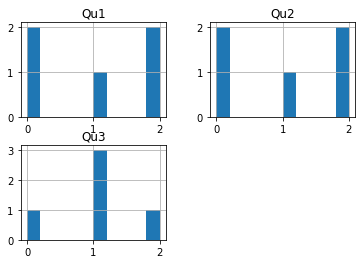

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
result.hist()